<a href="https://colab.research.google.com/github/himanshu-tawra/COVID-19-Detector-Flask-App-from-Chest-X-ray-Images-with-Keras-and-Deep-Learning/blob/master/97_94_accuracy_Inception_resnet_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from glob import glob
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.applications.inception_resnet_v2 import InceptionResNetV2
import keras

In [19]:
IMAGE_SIZE = [224,224]

In [20]:
inception_resnet = InceptionResNetV2(input_shape= IMAGE_SIZE + [3] , weights='imagenet',include_top=False)

In [21]:
for layer in inception_resnet.layers:
  layer.trainable = False

In [22]:
inception_resnet_output = inception_resnet.output

In [23]:
flatten = Flatten()(inception_resnet_output)
Dense_layer1 = Dense(units = 256,activation=keras.layers.LeakyReLU(alpha=0.3))(flatten)
output_layer = Dense(3,activation='softmax')(Dense_layer1)

In [24]:
model = Model(inputs = inception_resnet.input,outputs = output_layer)

In [25]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_203 (BatchN (None, 111, 111, 32) 96          conv2d_203[0][0]                 
__________________________________________________________________________________________________
activation_203 (Activation)     (None, 111, 111, 32) 0           batch_normalization_203[0][0]    
____________________________________________________________________________________________

In [26]:
model.compile(
    optimizer=keras.optimizers.Adam(0.000001),  # Low learning rate
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [11]:
training_data_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [12]:
val_data_gen = ImageDataGenerator(
    rescale = 1./255.
)

In [13]:
training_set = training_data_gen.flow_from_directory(
    '/content/drive/MyDrive/Data/train/',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = 32
)

Found 5144 images belonging to 3 classes.


In [14]:
val_set = val_data_gen.flow_from_directory(
    '/content/drive/My Drive/Data/test/',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = 32
)

Found 1288 images belonging to 3 classes.


In [18]:
from keras.callbacks import ModelCheckpoint
callback_list = [ModelCheckpoint('Research_inception_resnet_new.h5', monitor='accuracy', verbose=True, save_best_only=True)]

In [19]:
r = model.fit(
    training_set,
    epochs = 100,
    validation_data = val_set,
    validation_steps = len(val_set),
    steps_per_epoch = len(training_set),
    callbacks = callback_list
)

Epoch 1/100
161/161 [==============================] - 1621s 10s/step - loss: 1.0531 - accuracy: 0.5796 - val_loss: 0.3700 - val_accuracy: 0.8509

Epoch 00001: accuracy improved from -inf to 0.68449, saving model to Research_inception_resnet_new.h5
Epoch 2/100
161/161 [==============================] - 192s 1s/step - loss: 0.3957 - accuracy: 0.8434 - val_loss: 0.2706 - val_accuracy: 0.8991

Epoch 00002: accuracy improved from 0.68449 to 0.85517, saving model to Research_inception_resnet_new.h5
Epoch 3/100
161/161 [==============================] - 191s 1s/step - loss: 0.2963 - accuracy: 0.8871 - val_loss: 0.2229 - val_accuracy: 0.9193

Epoch 00003: accuracy improved from 0.85517 to 0.89036, saving model to Research_inception_resnet_new.h5
Epoch 4/100
161/161 [==============================] - 190s 1s/step - loss: 0.2402 - accuracy: 0.9074 - val_loss: 0.2113 - val_accuracy: 0.9193

Epoch 00004: accuracy improved from 0.89036 to 0.90785, saving model to Research_inception_resnet_new.h5
E

In [27]:
model.load_weights('/content/Research_inception_resnet_new.h5')

In [28]:
test_pred = []
test_actual = []
train_pred = []
train_actual = []
label_dict = {
    0 : "Covid",
    1 : "Normal",
    2 : "Pneumonia"
}
train_covid_path = '/content/drive/My Drive/Data/train/COVID19'
train_normal_path = '/content/drive/My Drive/Data/train/NORMAL'
train_pneumonia_path = '/content/drive/My Drive/Data/train/PNEUMONIA'


covid_path = '/content/drive/My Drive/Data/test/COVID19'
normal_path = '/content/drive/My Drive/Data/test/NORMAL'
pneumonia_path = '/content/drive/My Drive/Data/test/PNEUMONIA'

In [29]:
model.evaluate_generator(training_set,steps = 32,verbose = 1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


32/32 [==============================] - 39s 997ms/step - loss: 0.0629 - accuracy: 0.9763


[0.06165529042482376, 0.9794921875]

In [30]:
model.evaluate_generator(val_set,steps = 32, verbose = 1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


32/32 [==============================] - 24s 735ms/step - loss: 0.1126 - accuracy: 0.9629


[0.1125643402338028, 0.962890625]

In [31]:
def image_preprocessing(test_image):
  image_array = image.img_to_array(test_image)
  image_array = np.expand_dims(image_array,axis = 0)
  rescaled_image = image_array/255. 
  return rescaled_image

def predict_image(path):
  for filename in os.listdir(path):
    filepath = os.path.join(path,filename)
    test_image = image.load_img(filepath,target_size=(224,224))
    rescaled_image = image_preprocessing(test_image)


    predicted_image = model.predict(rescaled_image)
    predicted_image = predicted_image.argmax()
    if path == train_covid_path:
      train_pred.append(predicted_image)
      train_actual.append(0)
    elif path == covid_path:
      test_pred.append(predicted_image)
      test_actual.append(0)
    elif path == train_normal_path:
      train_pred.append(predicted_image)
      train_actual.append(1)
    elif path == normal_path:
      test_pred.append(predicted_image)
      test_actual.append(1)
    elif path == train_pneumonia_path:
      train_pred.append(predicted_image)
      train_actual.append(2)
    elif path == pneumonia_path:
      test_pred.append(predicted_image)
      test_actual.append(2)

In [32]:
predict_image(train_covid_path)
predict_image(train_normal_path)
predict_image(train_pneumonia_path)

predict_image(covid_path)
predict_image(normal_path)
predict_image(pneumonia_path)

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
testing_confusion_mat = confusion_matrix(test_actual,test_pred)
training_confusion_mat = confusion_matrix(train_actual,train_pred)
print(testing_confusion_mat)
print(training_confusion_mat)

[[111   1   4]
 [  0 296  21]
 [  0  32 823]]
[[ 460    0    0]
 [   0 1236   30]
 [   0   58 3360]]


In [34]:
def plot_confusion_matrix(confusion_mat,fig_name):

  classes = ['COVID','NORMAL','PNEUMONIA']
  tick_marks = [0.5,1.5,2.5]
  sns.heatmap(confusion_mat,cmap='plasma',annot=True,linewidth = 2,fmt = 'd')

  plt.xticks(tick_marks, classes,rotation ='vertical')
  plt.yticks(tick_marks, classes,rotation ='vertical')
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.savefig(fig_name + '.png')
  plt.margins(0.2) 

  plt.show()

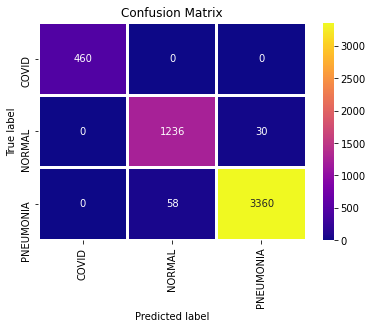

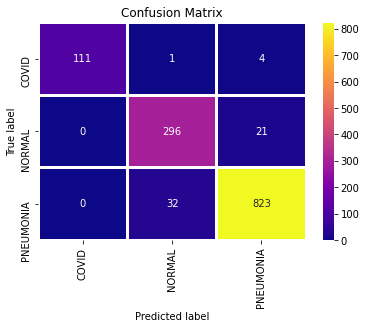

In [35]:

plot_confusion_matrix(training_confusion_mat,'Training_Confusion_Matrix')
plot_confusion_matrix(testing_confusion_mat,'Testing_Confusion_Matrix')

In [36]:

from sklearn.metrics import classification_report
print(classification_report(train_actual, train_pred,labels = [0,1,2],target_names=["Covid","Normal","Pneumonia"]))
print(classification_report(test_actual, test_pred,labels = [0,1,2],target_names=["Covid","Normal","Pneumonia"]))

              precision    recall  f1-score   support

       Covid       1.00      1.00      1.00       460
      Normal       0.96      0.98      0.97      1266
   Pneumonia       0.99      0.98      0.99      3418

    accuracy                           0.98      5144
   macro avg       0.98      0.99      0.98      5144
weighted avg       0.98      0.98      0.98      5144

              precision    recall  f1-score   support

       Covid       1.00      0.96      0.98       116
      Normal       0.90      0.93      0.92       317
   Pneumonia       0.97      0.96      0.97       855

    accuracy                           0.95      1288
   macro avg       0.96      0.95      0.95      1288
weighted avg       0.96      0.95      0.96      1288



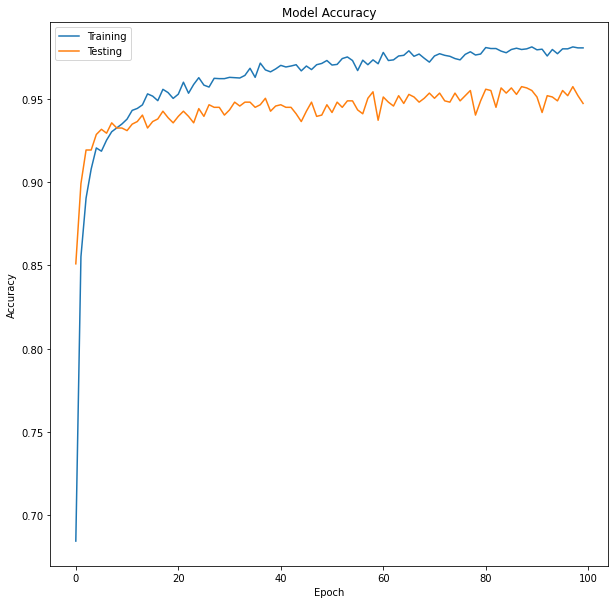

In [29]:
plt.figure(figsize=(10,10))

plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('xception_chest_accuracy.png')
plt.show()

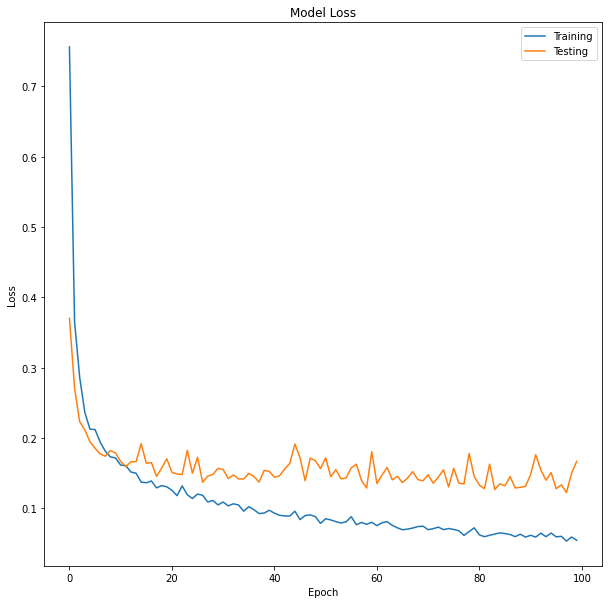

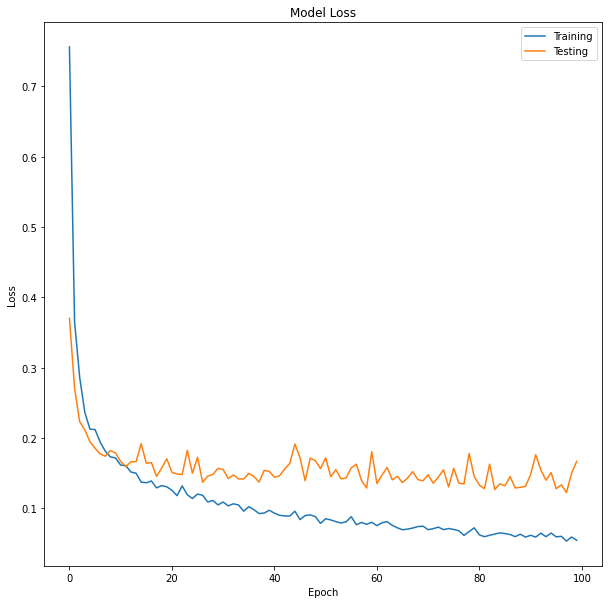

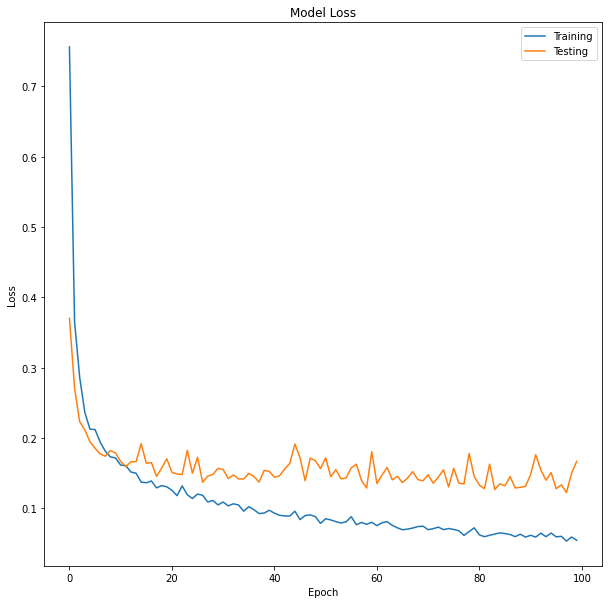

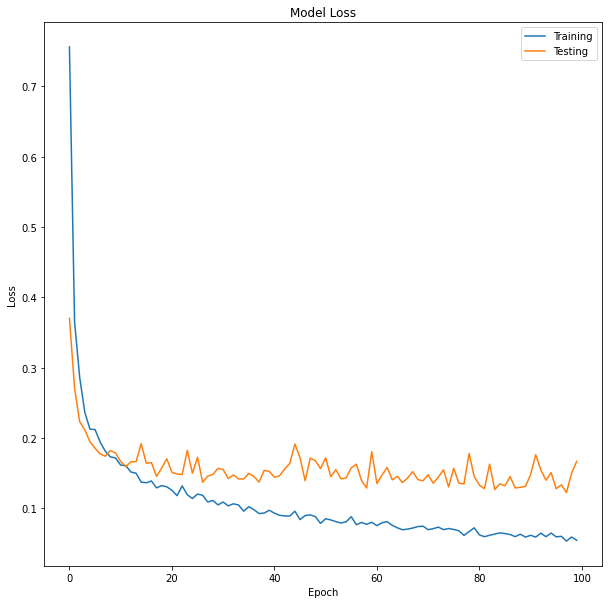

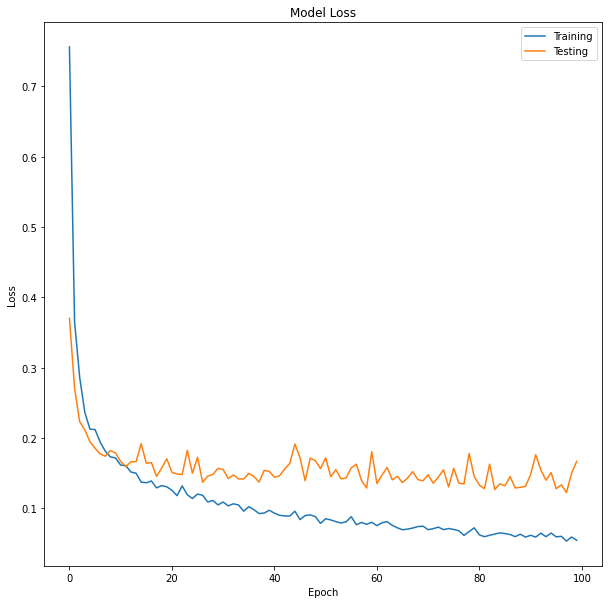

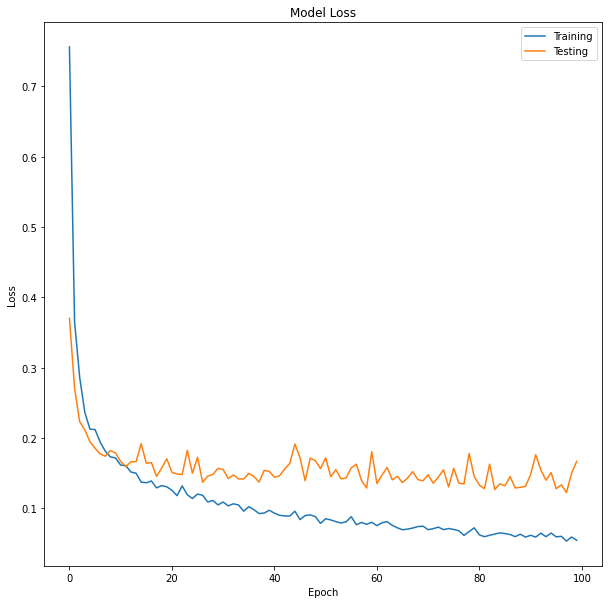

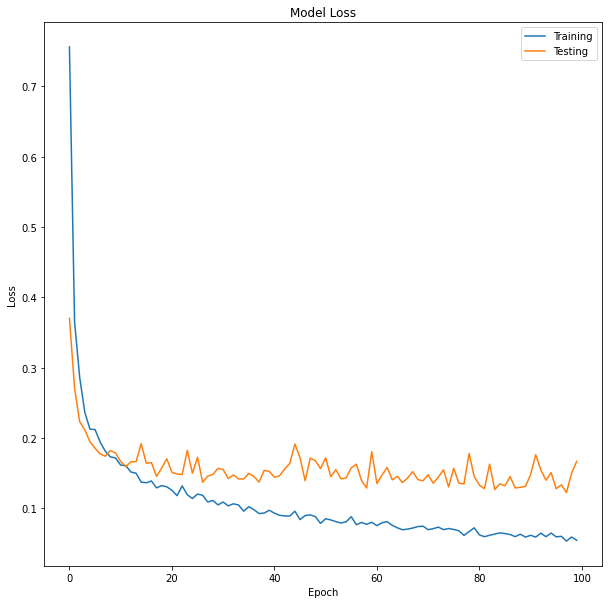

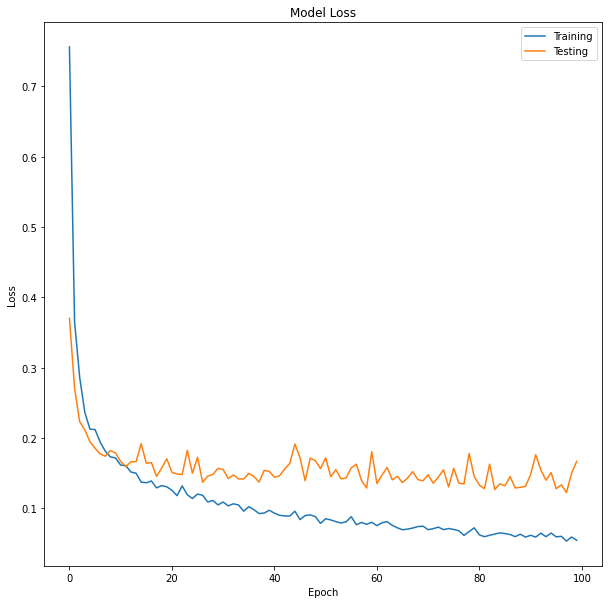

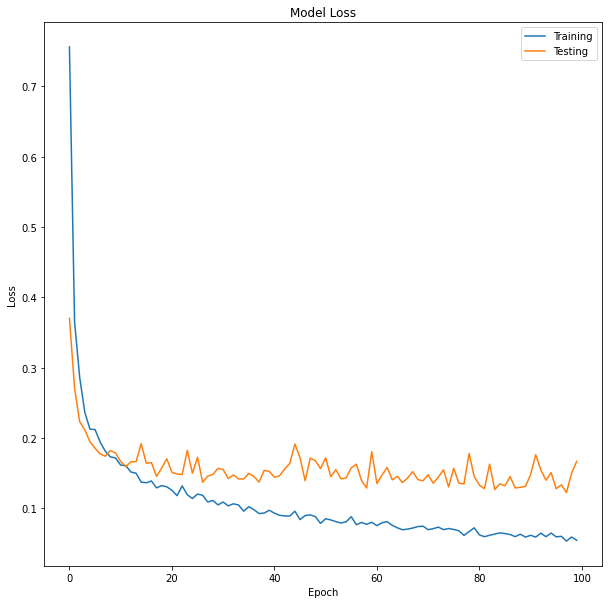

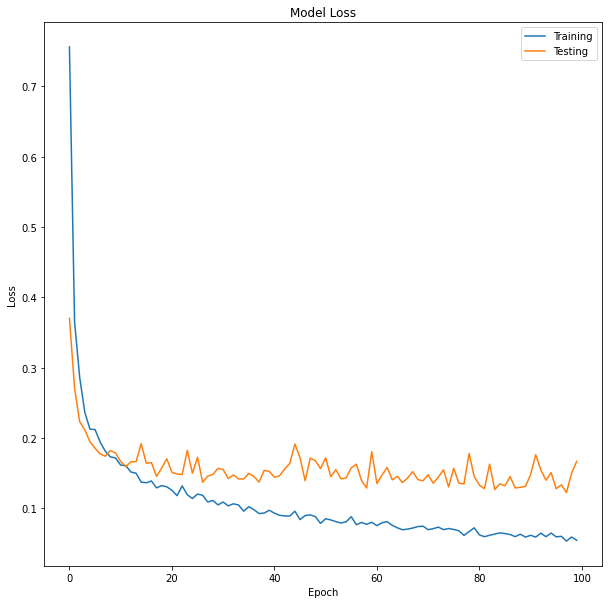

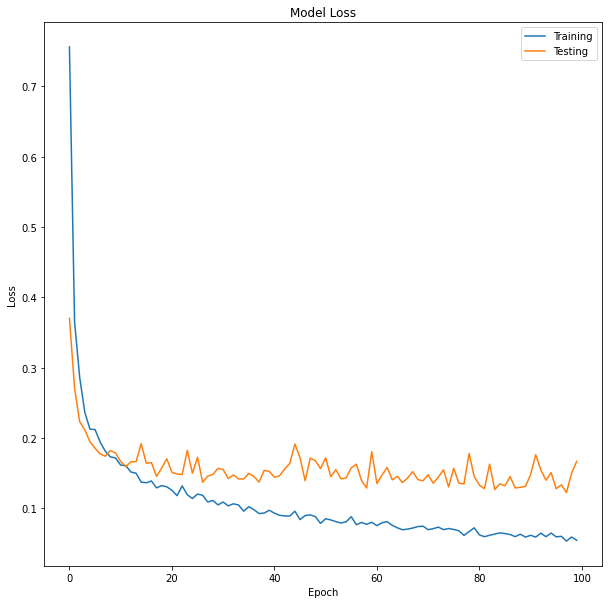

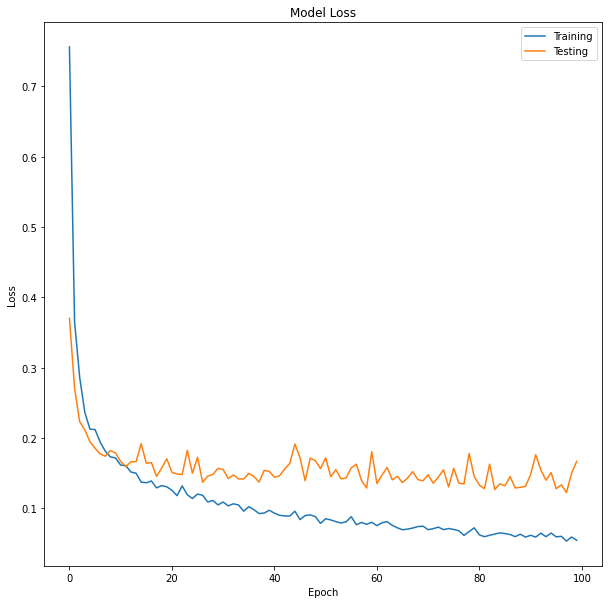

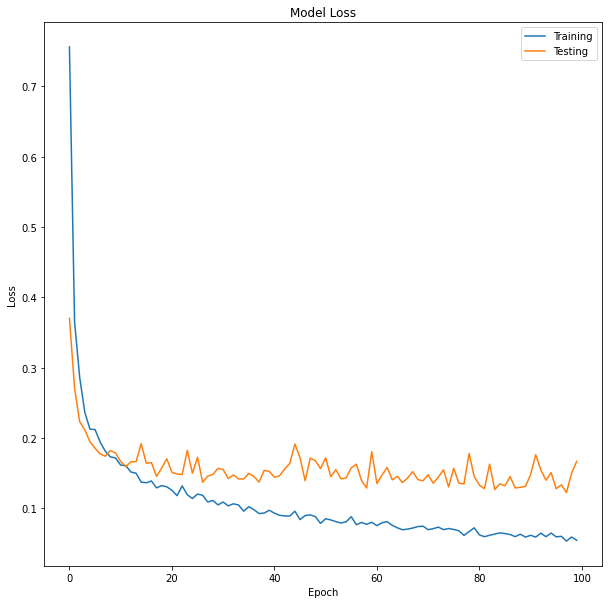

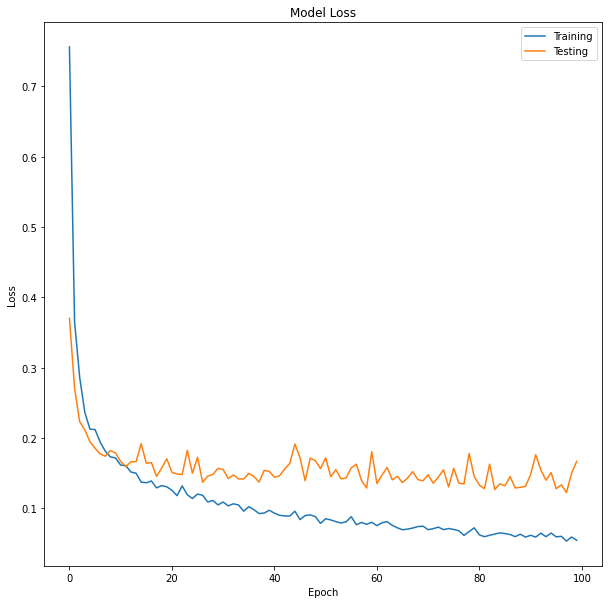

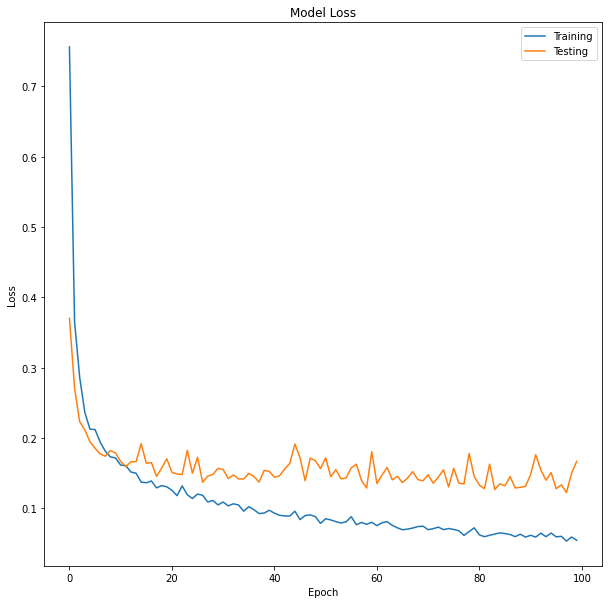

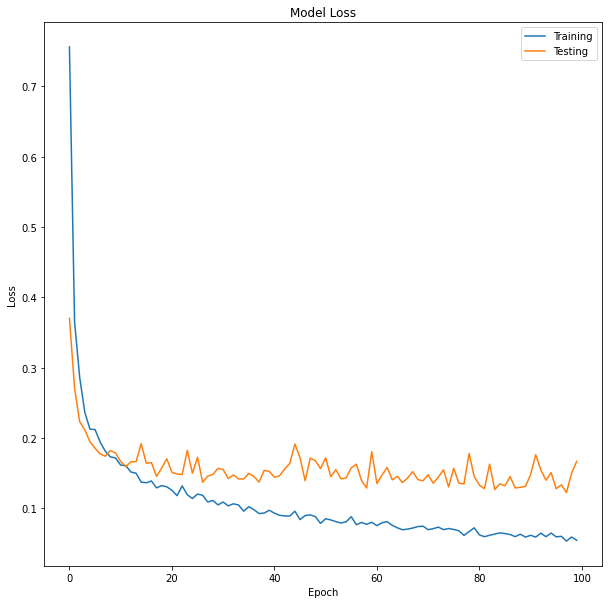

In [30]:

plt.figure(figsize=(10,10))

plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('xception_chest_loss.png')
plt.show()